# Akbank Derin Öğrenme Bootcamp

Merhaba, Bugün Akbank Derin Öğrenme Bootcamp'i için hazırladığım CNN ile architectural-heritage-elements veri setindeki mimari öğeleri sınıflandırma projemi inceleyeceğiz.

İlk olarak gerekli kütüphaneleri importlayarak başlıyoruz.
Kodun içinde satırlar ile ilgili gerekli açıklamalar bulunmaktadır.

In [1]:
# Derin öğrenme ve modelleme için
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner
from tensorflow.keras.layers import BatchNormalization

# Veri analizi ve görselleştirme için
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dosya işlemleri için
import os
import random

# Model değerlendirme metrikleri için
from sklearn.metrics import classification_report, confusion_matrix



2025-09-26 19:10:20.979556: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758913821.213656      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758913821.298495      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


* Burada temel dosya işlemlerimizi yapıp veri setimizi kullanacağımız dosya yollarımızı belirliyoruz ve ardından veri setimizden birkaç örnek resim gösteriyoruz.

10 adet sınıf bulundu.
Sınıflar: ['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']


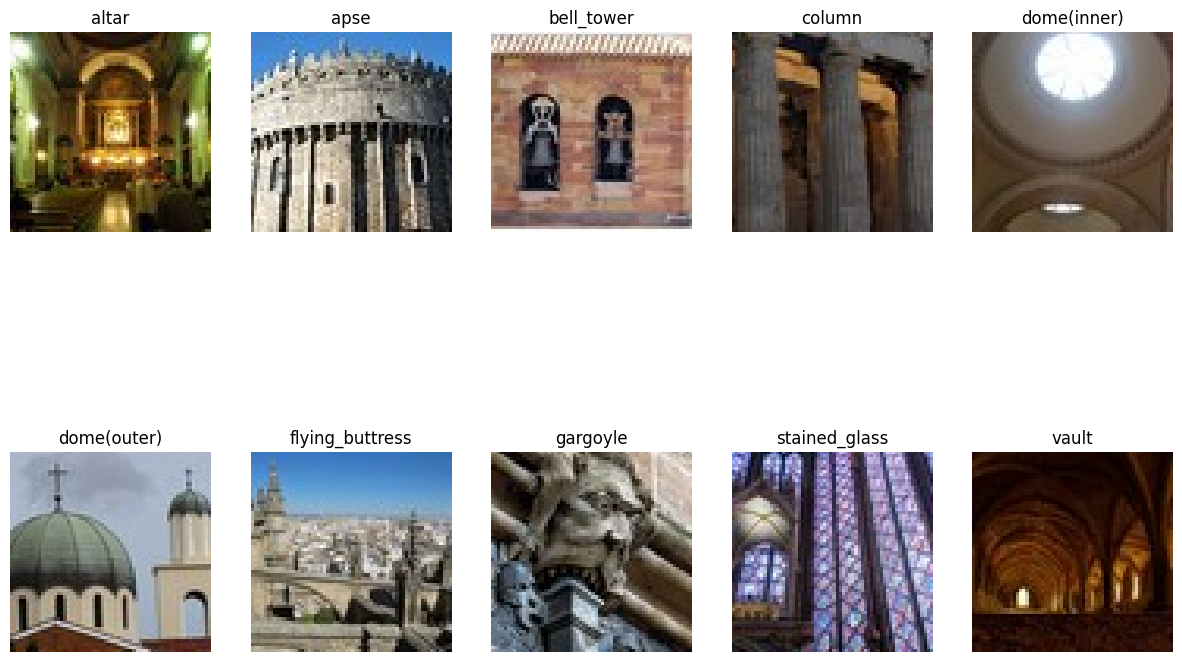

In [2]:
base_dir = '/kaggle/input/architectural-heritage-elements-image64-dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')



classes = sorted(os.listdir(train_dir))
print(f"{len(classes)} adet sınıf bulundu.")
print("Sınıflar:", classes)

plt.figure(figsize=(15, 10))
for i, cls in enumerate(classes):
    plt.subplot(2, 5, i + 1)
    # Her sınıftan rastgele bir resim seç
    img_name = random.choice(os.listdir(os.path.join(train_dir, cls)))
    img_path = os.path.join(train_dir, cls, img_name)
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.show()

* Görüntülerimiz üzerinde boyut yapılandırma, veri modifiyesiyle çoğaltma ve verimizi train,test,validation olarak bölme işlemlerimizi yapıyoruz

In [4]:
# Görüntü boyutları ve batch size 
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Eğitim verileri için veri çoğaltma ve doğrulama seti ayırma
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 # Eğitim verisinin %20'sini doğrulama için ayır
)

# Test verileri için ayrı bir generator oluşturuyoruz 
test_datagen = ImageDataGenerator(rescale=1./255)

# flow_from_directory ile verileri yükleme
train_generator = train_datagen.flow_from_directory(
    train_dir, # Eğitim verilerini bu yoldan al
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training' # Bu bölüm eğitim setidir
)

validation_generator = train_datagen.flow_from_directory(
    train_dir, # Doğrulama verilerini de eğitim yolundan ayır
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' # Bu bölüm doğrulama setidir
)

# Test verilerini ayrı bir yoldan yükleyen test_generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False # Tahmin ve gerçek etiketlerin sırasını korumak için shuffle=False OLMALI
)

Found 8108 images belonging to 10 classes.
Found 2022 images belonging to 10 classes.
Found 1404 images belonging to 10 classes.


* Burası modelimizi işlemeden önce keras-tuner kullanarak optimum değerleri bulduğumuz kısımdır. Optimum değerler bulunduktan sonra kullanımdan çıkarılmıştır fakat incelemek isteyenler için silmeden burada bırakıyorum. ( learning rate : 0.001 , dense : 384 , dropout : 0.2) 

In [ ]:
#def build_model(hp):
 #   model = Sequential()
    
    # Giriş katmanı ve ilk blok
  #  model.add(Conv2D(
   #     filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=32),
    #    kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
     #   activation='relu',
      #  input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
   # ))
   # model.add(MaxPooling2D(2, 2))

    # İkinci blok
   # model.add(Conv2D(
    #    filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=32),
     #   kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
      #  activation='relu'
  #  ))
  #  model.add(MaxPooling2D(2, 2))
    
  #  model.add(Flatten())
    
    # Dropout oranı
  #  model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Dense katmanı
  #  model.add(Dense(
  #      units=hp.Int('dense_units', min_value=256, max_value=1024, step=128),
   #     activation='relu'
   # ))
    
    # Çıkış katmanı
   # model.add(Dense(len(classes), activation='softmax'))
    
    # Optimizer için öğrenme oranını da deneme listesine ekle
  #  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
   # model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
    #              loss='categorical_crossentropy',
     #             metrics=['accuracy'])
    
   # return model

In [ ]:
 #tuner = keras_tuner.RandomSearch(
 #   build_model,
 #   objective='val_accuracy', # Amaç: en yüksek doğrulama başarımını bulmak
 #   max_trials=10, # Toplamda 10 farklı kombinasyon deneyecek
 #   executions_per_trial=1, # Her kombinasyonu 1 kez eğitecek
 #   directory='my_dir',
  #  project_name='hparam_tuning'
 #)

# Aramayı başlat 
 #tuner.search(train_generator, epochs=10, validation_data=validation_generator)

# En iyi hiperparametreleri göster
#best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

#print(f"""
#En iyi öğrenme oranı: {best_hps.get('learning_rate')}
#En iyi Dropout oranı: {best_hps.get('dropout_rate')}
#En iyi Dense katmanı birim sayısı: {best_hps.get('dense_units')}
#""") 

In [ ]:
#best_model = tuner.get_best_models(num_models=1)[0]

# En iyi modeli daha uzun süre eğit
#history = best_model.fit(train_generator, epochs=25, validation_data=validation_generator) """

* Burda final modelimizin katmanlarını oluşturuyoruz. Değerlerimizi keras-tuner'ın önerdiği değerler olarak kullandık.

In [5]:
final_model = Sequential([
    
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    
    MaxPooling2D(2, 2),
    
    Flatten(),
    
    # Tuner'ın bulduğu en iyi Dropout oranı
    Dropout(0.2),

    # Tuner'ın bulduğu en iyi Dense katmanı birim sayısı
    Dense(384, activation='relu'),

    # Çıkış katmanı (sınıf sayısı aynı)
    Dense(len(classes), activation='softmax')
])

# Tuner'ın bulduğu en iyi öğrenme oranına sahip optimizer'ı tanımla
final_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Modeli derle
final_model.compile(optimizer=final_optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

final_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758913872.807927      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758913872.808623      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 384)            │    14,205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         3,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,302,410 (54.56 MB)

 Trainable params: 14,302,410 (54.56 MB)

 Non-trainable params: 0 (0.00 B)

* Ardından epochlarımız için çok fazla zaman harcamamak,modelin en iyi halinde durmak için EarlyStopping'den yararlanıyoruz ve model eğitimine başlıyoruz.

In [6]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Nihai modeli daha uzun bir epoch sayısıyla ve EarlyStopping ile eğit
# Not: EarlyStopping sayesinde 50 epoch'un tamamı bitmeyebilir, en iyi noktada duracaktır.
functional_model = tf.keras.Model(inputs=final_model.inputs, outputs=final_model.outputs)
history = final_model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1758913886.961831     145 service.cc:148] XLA service 0x7f13b4006d60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758913886.962923     145 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758913886.962944     145 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758913887.348577     145 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/254 ━━━━━━━━━━━━━━━━━━━━ 30:21 7s/step - accuracy: 0.0625 - loss: 2.3126

I0000 00:00:1758913891.509499     145 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


254/254 ━━━━━━━━━━━━━━━━━━━━ 94s 345ms/step - accuracy: 0.3155 - loss: 1.9320 - val_accuracy: 0.5015 - val_loss: 1.3728
Epoch 2/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 54s 212ms/step - accuracy: 0.5140 - loss: 1.3564 - val_accuracy: 0.5598 - val_loss: 1.2494
Epoch 3/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 54s 213ms/step - accuracy: 0.5518 - loss: 1.2498 - val_accuracy: 0.5974 - val_loss: 1.1691
Epoch 4/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 54s 211ms/step - accuracy: 0.6150 - loss: 1.0969 - val_accuracy: 0.6192 - val_loss: 1.1283
Epoch 5/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 55s 215ms/step - accuracy: 0.6274 - loss: 1.0472 - val_accuracy: 0.6563 - val_loss: 1.0317
Epoch 6/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 54s 214ms/step - accuracy: 0.6553 - loss: 0.9960 - val_accuracy: 0.6405 - val_loss: 1.0606
Epoch 7/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 55s 216ms/step - accuracy: 0.6629 - loss: 0.9625 - val_accuracy: 0.6464 - val_loss: 1.0250
Epoch 8/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 55s 216ms/step - accuracy: 0.6768 - loss: 0.9147 - val

* 35 epoch geçtikten sonra 0.8050 accuracy ile model eğitimimiz duruyor. Fakat bu tam olarak accuracy değerimizin 0.8 olduğunu kanıtlamıyor.
over-fitting ve under-fitting incelemeleri için grafiklerimizi inceliyoruz.

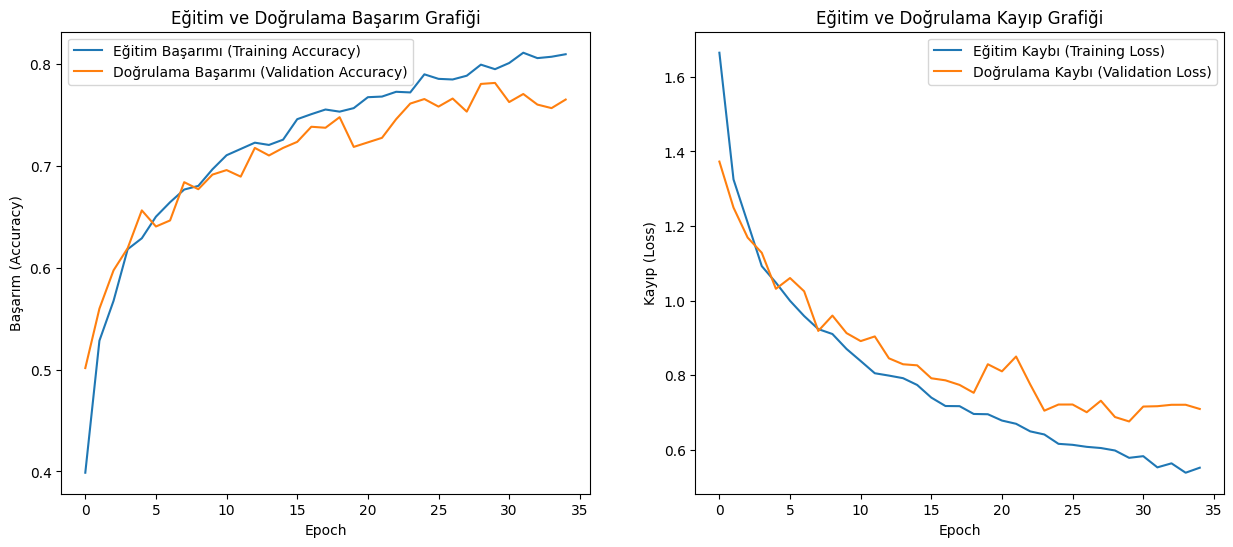

In [7]:
# Eğitim sürecinden gelen 'history' objesini kullanarak grafikleri çizdiriyoruz.

# --- ACCURACY GRAFİĞİ ---
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Başarımı (Training Accuracy)')
plt.plot(history.history['val_accuracy'], label='Doğrulama Başarımı (Validation Accuracy)')
plt.title('Eğitim ve Doğrulama Başarım Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Başarım (Accuracy)')
plt.legend()

# --- LOSS (KAYIP) GRAFİĞİ ---
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı (Training Loss)')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı (Validation Loss)')
plt.title('Eğitim ve Doğrulama Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Kayıp (Loss)')
plt.legend()

plt.show()

**Göründüğü üzere modelimizde %4 ila %5 over-fitting var. Bu modelin veri setimizdeki veriler hariç başka verilerle karşılaşırsa hafiften çuvallamaya başladığını gösterir. Bu sorunu early stopping'e patience ekleyerek, learning rate'imizi azaltarak, veya data augmention ile veri setimizi farklılaştırarak çözebiliriz.**

In [8]:


# Modelin genel kaybını ve doğruluğunu test seti üzerinde hesaplıyoruz.
test_loss, test_accuracy = final_model.evaluate(test_generator)
print(f"\nTest Seti Başarımı (Test Accuracy): {test_accuracy:.4f}")
print(f"Test Seti Kaybı (Test Loss): {test_loss:.4f}")

# Test seti üzerinde tahminler yapıyoruz.
# Doğru etiketler ile tahminlerin sırasının eşleşmesi için test_generator'ı sıfırlıyoruz.
test_generator.reset()
predictions = final_model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Sınıf isimlerini alıyoruz (bu daha sonra raporlamada kullanılacak)
class_names = list(test_generator.class_indices.keys())

44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.7379 - loss: 0.7651

Test Seti Başarımı (Test Accuracy): 0.7635
Test Seti Kaybı (Test Loss): 0.7253
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


* Burada %0.76 olan accuracy model eğitilirken 0.8 idi.


--- Sınıflandırma Raporu (Classification Report) ---
                 precision    recall  f1-score   support

          altar       0.68      0.74      0.71       140
           apse       0.53      0.68      0.60        50
     bell_tower       0.73      0.69      0.71       170
         column       0.80      0.69      0.74       210
    dome(inner)       0.65      0.93      0.76        69
    dome(outer)       0.76      0.84      0.80       142
flying_buttress       0.54      0.71      0.61        70
       gargoyle       0.86      0.78      0.82       240
  stained_glass       0.94      0.95      0.94       150
          vault       0.85      0.69      0.76       163

       accuracy                           0.76      1404
      macro avg       0.73      0.77      0.74      1404
   weighted avg       0.78      0.76      0.77      1404


--- Karmaşıklık Matrisi (Confusion Matrix) ---


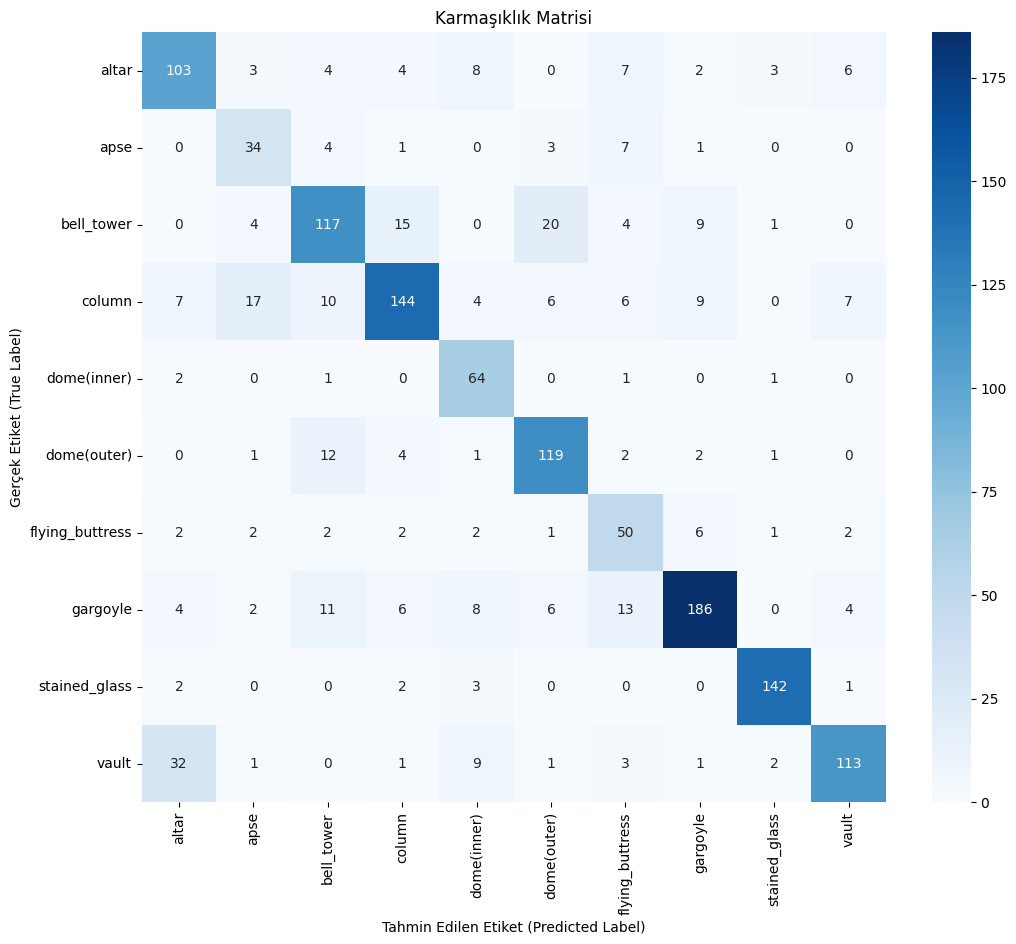

In [9]:
# --- SINIFLANDIRMA RAPORU ---
# Her sınıf için precision, recall, f1-score gibi metrikleri gösterir.
print("\n--- Sınıflandırma Raporu (Classification Report) ---")
print(classification_report(y_true, y_pred, target_names=class_names))


# --- KARMAŞIKLIK MATRİSİ (CONFUSION MATRIX) ---
# Hangi sınıfın hangi sınıfla karıştırıldığını görsel olarak gösterir.
print("\n--- Karmaşıklık Matrisi (Confusion Matrix) ---")
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket (Predicted Label)')
plt.ylabel('Gerçek Etiket (True Label)')
plt.show()

**Bu confusion matrix sonuçlarına bakıldığında modelinizin performansı oldukça değişken. En iyi performans gösteren sınıf stained_glass ile %94.7 doğruluk oranına sahip, 142 doğru tahmin yapıyor ve sadece 8 hata var. Gargoyle sınıfı da 186 doğru tahminle iyi performans gösteriyor ancak bu sınıfın 240 örneği var yani veri setinde en fazla temsil edilen sınıf. Dome outer da %83.8 ile oldukça başarılı.
Sorunlu sınıflara bakıldığında apse en kötü performansı gösteriyor, sadece 34 doğru tahmin yapıyor ve toplamda 50 örneği var. Flying buttress da 50 doğru tahminle orta seviyede kalıyor. Altar sınıfı 103 doğru tahmin yapsa da 32 tanesini vault olarak yanlış sınıflandırmış, bu iki sınıf arasında karışıklık var.
Genel olarak modelin bazı mimari yapıları birbirine karıştırdığı görülüyor. Bell tower ile dome outer arasında 20 hatalı sınıflandırma, column ile bell tower arasında 17 hata var. Bu durum benzer görsel özelliklere sahip mimari elemanların birbirinden ayırt edilememesinden kaynaklanıyor.
Veri dengesizliği de açık bir problem, gargoyle 240 örnekle en fazlayken apse sadece 50 örnek. Bu durum modelin daha fazla verisi olan sınıflarda daha iyi performans göstermesine neden oluyor. Class weights kullanarak bu dengesizliği düzeltmek gerekiyor.
Toplam accuracy %75 civarında görünüyor ki bu training accuracy ile validation accuracy arasındaki farkı doğruluyor. Model overfitting yaşadığı için test verisinde genelleme yapamıyor ve confusion matrix da bunu net gösteriyor.**

Eigen-CAM için kullanılacak katman: conv2d_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


/tmp/ipykernel_36/2542787221.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap("jet")


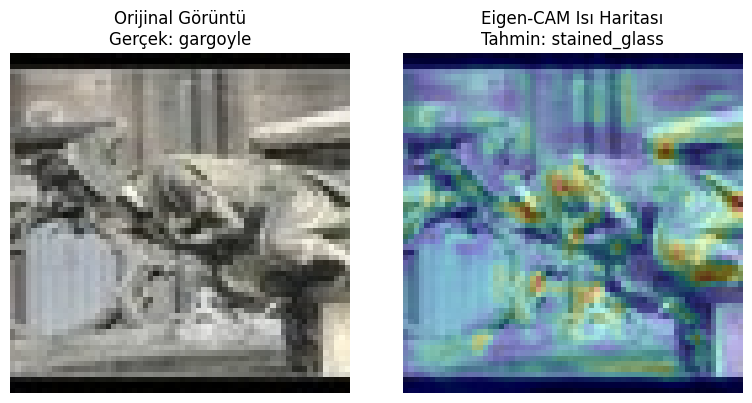

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


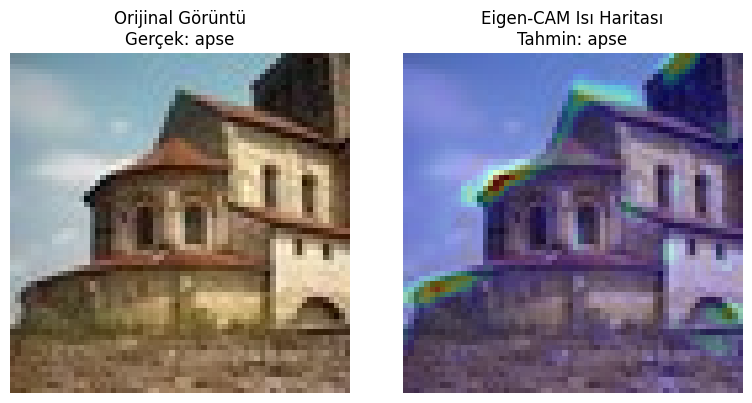

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


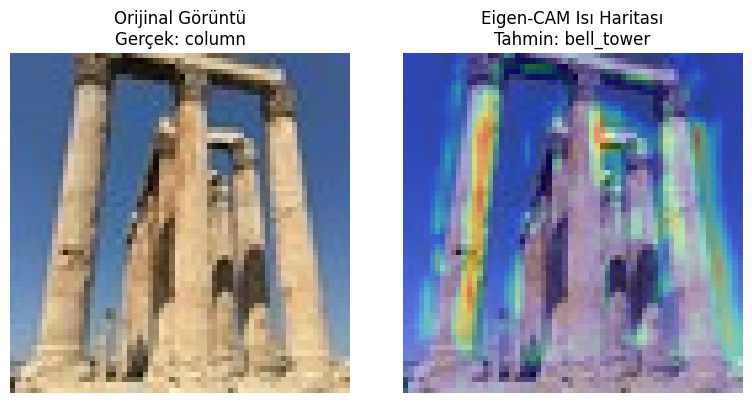

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


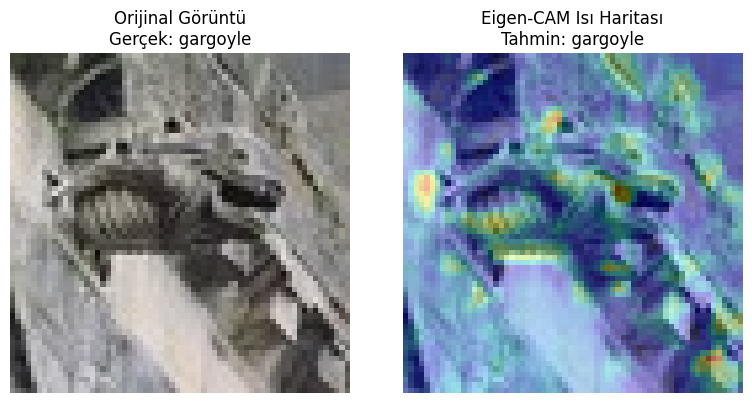

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


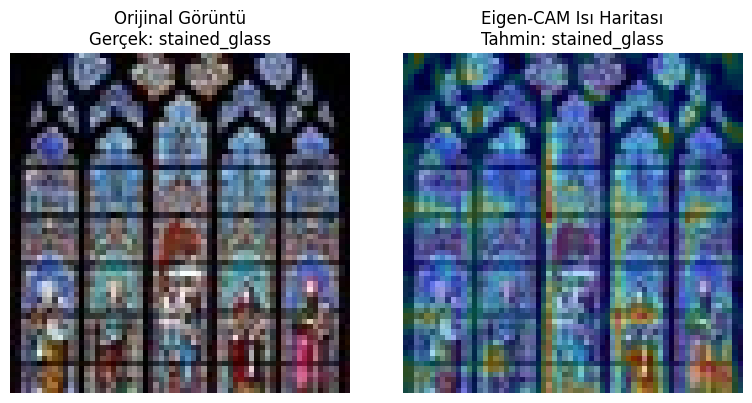

In [12]:
# --- EIGEN-CAM UYGULAMASI ---
import cv2
# Görüntüyü modele uygun formata getiren fonksiyon 
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

# Isı haritasını orijinal görüntü üzerine yerleştiren fonksiyon 
def display_superimposed_heatmap(img_path, heatmap, alpha=0.4):
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)
    
    # Isı haritasını orijinal görüntü boyutuna yeniden boyutlandır
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    
    heatmap = np.uint8(255 * heatmap)
    jet = plt.cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)
    
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    return superimposed_img


# 1. Son konvolüsyon katmanından özellik haritalarını çıkaran yeni bir model oluştur
last_conv_layer_name = None
for layer in reversed(functional_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break
print(f"Eigen-CAM için kullanılacak katman: {last_conv_layer_name}")

feature_extractor = tf.keras.Model(inputs=functional_model.inputs, outputs=functional_model.get_layer(last_conv_layer_name).output)

# 2. Test setinden rastgele görüntüler seç ve Eigen-CAM uygula
num_images_to_show = 5
random_indices = random.sample(range(len(test_generator.filepaths)), num_images_to_show)

for i in random_indices:
    img_path = test_generator.filepaths[i]
    img_array = get_img_array(img_path, size=(IMG_HEIGHT, IMG_WIDTH))

    # Modelin tahminini al
    preds = functional_model.predict(img_array)
    pred_class_name = class_names[np.argmax(preds)]
    true_class_name = class_names[test_generator.labels[i]]

    # Özellik haritalarını çıkar
    features = feature_extractor.predict(img_array)
    
    # Eigen-CAM Hesaplaması: Özelliklerin ana bileşenini (basitçe ortalamasını) alıyoruz
    
    heatmap = np.mean(features[0], axis=-1)
    
    # Isı haritasını normalleştir
    heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))

    # Isı haritasını orijinal görüntü ile birleştir
    superimposed_img = display_superimposed_heatmap(img_path, heatmap)

    # Sonuçları çizdir
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(plt.imread(img_path))
    plt.title(f"Orijinal Görüntü\nGerçek: {true_class_name}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title(f"Eigen-CAM Isı Haritası\nTahmin: {pred_class_name}")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()